# Item based collaborative filtering python

In [1]:
#importing neccesary packages
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Step 1 - Data Preparation

In [2]:
#Reading movielens data from 
#https://grouplens.org/datasets/movielens/
my_df = pd.read_csv('ml-100k\\u.data', sep='\t', names=['userId','itemId','rating','timestamp'])

In [3]:
#Checking Data
my_df.head()

,userId,itemId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## userId - the ID of the user who rated item.
## itemId - the ID of the movie.
## rating - rating provided by user between 1 and 5.
## timestamp - The time the item was rated.
## item_name - represents title of the product.

In [4]:
#Importing movie title and joining with main data
productName = pd.read_csv('productName.csv',encoding= 'unicode_escape')
my_df = pd.merge(my_df, productName, on='itemId')
my_df.head()

,userId,itemId,rating,timestamp,item_name
0,196,242,3,881250949,Rialto Boots
1,63,242,3,875747190,Rialto Boots
2,226,242,5,883888671,Rialto Boots
3,154,242,3,879138235,Rialto Boots
4,306,242,5,876503793,Rialto Boots


# Step 2 - Data exploration

In [5]:
#Statitical features of the movie
my_df.describe()

,userId,itemId,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [6]:
#creating mean ratings data
ratings = pd.DataFrame(my_df.groupby('item_name')['rating'].mean())
ratings.head(10)

,rating
item_name,
20Dresses Brown Shiver Me Timbers Boots,3.333333
"3wish CUR-BLUE Silver Blue 8023 Analog Watch - For Boys, Men",4.260870
612 League Girl's Gathered Dress,3.204969
612 League Girl's Shift Dress,2.777778
"@499 Casual, Festive, Formal, Lounge Wear, Party Sleeveless Embellished Women's Top",3.095890
@home Glass Vase,2.400000
"A Avon PK_504 Analog Watch - For Men, Boys",3.875000
"A Avon PK_741 Analog Watch - For Men, Boys",3.114583
A R ENTERPRISES musical wlking cow,3.162500


In [7]:
#creating number of ratings data
ratings['number_of_ratings'] = my_df.groupby('item_name')['rating'].count()
ratings.head(10)

,rating,number_of_ratings
item_name,,
20Dresses Brown Shiver Me Timbers Boots,3.333333,6
"3wish CUR-BLUE Silver Blue 8023 Analog Watch - For Boys, Men",4.260870,46
612 League Girl's Gathered Dress,3.204969,161
612 League Girl's Shift Dress,2.777778,9
"@499 Casual, Festive, Formal, Lounge Wear, Party Sleeveless Embellished Women's Top",3.095890,73
@home Glass Vase,2.400000,5
"A Avon PK_504 Analog Watch - For Men, Boys",3.875000,256
"A Avon PK_741 Analog Watch - For Men, Boys",3.114583,96
A R ENTERPRISES musical wlking cow,3.162500,80


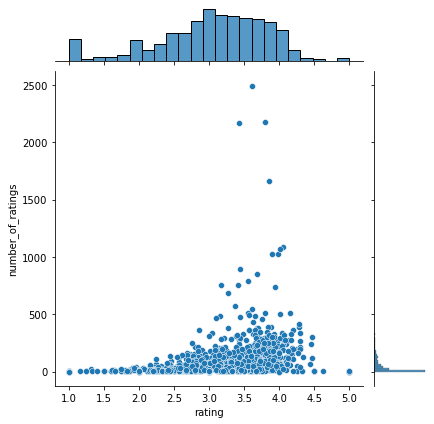

In [8]:
#Plotting the jointplot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)


# Creating User - Item interaction matrix

In [9]:
#creating the user-item interaction matrix
item_matrix_UII = my_df.pivot_table(index='userId', columns='item_name', values='rating')
item_matrix_UII.head()

item_name,20Dresses Brown Shiver Me Timbers Boots,"3wish CUR-BLUE Silver Blue 8023 Analog Watch - For Boys, Men",612 League Girl's Gathered Dress,612 League Girl's Shift Dress,"@499 Casual, Festive, Formal, Lounge Wear, Party Sleeveless Embellished Women's Top",@home Glass Vase,"A Avon PK_504 Analog Watch - For Men, Boys","A Avon PK_741 Analog Watch - For Men, Boys",A R ENTERPRISES musical wlking cow,ABHIRA Girl's A-line Dress,...,knp enterprise Audi Style Alloy Mangalsutra,medha Women's Multicolor Leggings,morpankh Enterprise Floral Print Bollywood Georgette Sari,oxford Tawa 15 cm cm diameter,"poonamcreation Zircon Rhodium Plated Alloy, Stone Necklace Set",prored Men's Printed No Show Socks,reckonon red heart 011 Umbrella,salt n pepper 16-510 BLACK Lace Up,vency creation A02 usb a110 Led Light,womaniya Alloy Bracelet
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,5.0,NaN,NaN,NaN,NaN,NaN,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Most rated movies
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
item_name,,
Kielz Ladies Boots,3.612670,2494
Steppings Trendy Boots,3.801471,2176
Navaksha Necktie Men's Combo,3.428835,2171
Alisha Solid Women's Cycling Shorts,3.858519,1661
First Choice Cotton Embroidered Diwan Set,4.049496,1091
Vishudh Printed Women's Straight Kurta,4.010300,1068
Shuz Touch Boots,3.905734,1029
MASARA Solid Women's Straight Kurta,3.980507,1026
Kiara Jewellery Sterling Silver Cubic Zirconia Rhodium Ring,3.448546,894


# Making recommendation - Example product- Shuz Touch Boots	

In [11]:
#Fetching ratings for Shuz Touch Boots
shuzTouchBootsRating = item_matrix_UII['Shuz Touch Boots']

In [12]:
shuzTouchBootsRating

userId
1      4.25
2      4.00
3       NaN
4       NaN
5      5.00
       ... 
939     NaN
940    4.00
941     NaN
942    5.00
943    4.00
Name: Shuz Touch Boots, Length: 943, dtype: float64

In [13]:
#Finding the similarity using correlation with different items
similarToBoot=item_matrix_UII.corrwith(shuzTouchBootsRating)

In [14]:
#Observing the result
similarToBoot.head(10)

item_name
20Dresses Brown Shiver Me Timbers Boots                                               -1.000000
3wish CUR-BLUE Silver Blue 8023 Analog Watch  - For Boys, Men                          0.212430
612 League Girl's Gathered Dress                                                       0.247506
612 League Girl's Shift Dress                                                          0.419627
@499 Casual, Festive, Formal, Lounge Wear, Party Sleeveless Embellished Women's Top    0.430109
@home Glass Vase                                                                       0.301511
A Avon PK_504 Analog Watch  - For Men, Boys                                            0.113588
A Avon PK_741 Analog Watch  - For Men, Boys                                            0.156003
A R ENTERPRISES musical wlking cow                                                     0.182389
ABHIRA Girl's A-line Dress                                                             0.114346
dtype: float64

# creating a threshold for minimum number of ratings

In [15]:
#creating dataframe to bring in #of ratings
corr_boot = pd.DataFrame(similarToBoot, columns=['correlation'])
corr_boot.dropna(inplace=True)
corr_boot.head(10)

,correlation
item_name,
20Dresses Brown Shiver Me Timbers Boots,-1.000000
"3wish CUR-BLUE Silver Blue 8023 Analog Watch - For Boys, Men",0.212430
612 League Girl's Gathered Dress,0.247506
612 League Girl's Shift Dress,0.419627
"@499 Casual, Festive, Formal, Lounge Wear, Party Sleeveless Embellished Women's Top",0.430109
@home Glass Vase,0.301511
"A Avon PK_504 Analog Watch - For Men, Boys",0.113588
"A Avon PK_741 Analog Watch - For Men, Boys",0.156003
A R ENTERPRISES musical wlking cow,0.182389


In [16]:
#Bringining in ratings
corr_boot = corr_boot.join(ratings['number_of_ratings'])

corr_boot.head(10)

,correlation,number_of_ratings
item_name,,
20Dresses Brown Shiver Me Timbers Boots,-1.000000,6
"3wish CUR-BLUE Silver Blue 8023 Analog Watch - For Boys, Men",0.212430,46
612 League Girl's Gathered Dress,0.247506,161
612 League Girl's Shift Dress,0.419627,9
"@499 Casual, Festive, Formal, Lounge Wear, Party Sleeveless Embellished Women's Top",0.430109,73
@home Glass Vase,0.301511,5
"A Avon PK_504 Analog Watch - For Men, Boys",0.113588,256
"A Avon PK_741 Analog Watch - For Men, Boys",0.156003,96
A R ENTERPRISES musical wlking cow,0.182389,80


In [17]:
corr_boot[corr_boot['number_of_ratings'] > 50].sort_values(by='correlation', ascending=False).head(20)

,correlation,number_of_ratings
item_name,,
Shuz Touch Boots,1.000000,1029
BlueStone The Elettra Yellow Gold Diamond 18 K Ring,0.501930,69
"Franck Bella FB127A Analog Watch - For Boys, Men",0.441566,66
"@499 Casual, Festive, Formal, Lounge Wear, Party Sleeveless Embellished Women's Top",0.430109,73
Now SP-ETHNIC Analog Watch - For Boys,0.428865,350
Ishtaa Gold Cubic Zirconia 18 K Ring,0.427950,57
Silver Streak Men's Printed Casual Denim Shirt,0.416492,213
Eurospa Cotton Terry Face Towel Set,0.408933,151
Selfcare Soft & Comfortable Newly Launched Girl's Top,0.408409,114
